In [272]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv("data/silver.csv")
pd.set_option('display.max_columns', None)  

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 18 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Invoice                                      824364 non-null  object 
 1   StockCode                                    824364 non-null  object 
 2   Quantity                                     824364 non-null  int64  
 3   InvoiceDate                                  824364 non-null  object 
 4   year                                         824364 non-null  int64  
 5   month                                        824364 non-null  int64  
 6   Price                                        824364 non-null  float64
 7   Customer ID                                  824364 non-null  float64
 8   Country                                      824364 non-null  object 
 9   Total                                        824364 non-nul

In [274]:
print(df.columns)


Index(['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'year', 'month',
       'Price', 'Customer ID', 'Country', 'Total', 'total_facture', 'Montant',
       'nombre_commande_client_années_2009',
       'nombre_commande_client_années_2010',
       'nombre_commande_client_années_2011',
       'nombre_commande_client_années_annulées_2009',
       'nombre_commande_client_années_annulées_2010',
       'nombre_commande_client_années_annulées_2011'],
      dtype='object')


In [275]:
# profile =ProfileReport(df, title = "Profiling Report")
# profile.to_widgets()

In [276]:
Country_uniques = df['Country'].unique()
print(Country_uniques)

['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Nigeria'
 'Malta' 'RSA' 'Singapore' 'Bahrain' 'Thailand' 'Israel' 'Lithuania'
 'West Indies' 'Korea' 'Brazil' 'Canada' 'Iceland' 'Lebanon'
 'Saudi Arabia' 'Czech Republic' 'European Community']


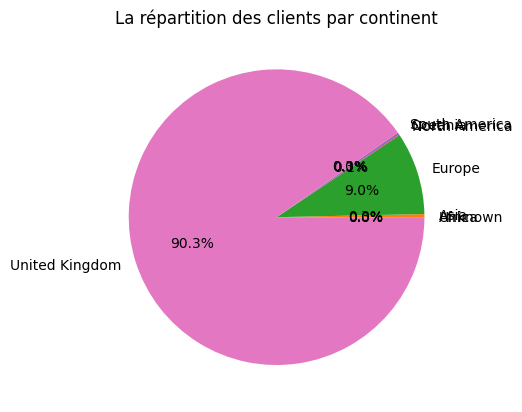

In [277]:
country_to_continent = {
'United Kingdom': 'United Kingdom',
'France': 'Europe',
'USA': 'North America',
'Belgium': 'Europe',
'Australia': 'Oceania',
'EIRE': 'Europe',
'Germany': 'Europe',
'Portugal': 'Europe',
'Japan': 'Asia',
'Denmark': 'Europe',
'Netherlands': 'Europe',
'Poland': 'Europe',
'Spain': 'Europe',
'Channel Islands': 'Europe',
'Italy': 'Europe',
'Cyprus': 'Asia',
'Greece': 'Europe',
'Norway': 'Europe',
'Austria': 'Europe',
'Sweden': 'Europe',
'United Arab Emirates': 'Asia',
'Finland': 'Europe',
'Switzerland': 'Europe',
'Unspecified': 'Unknown',
'Nigeria': 'Africa',
'Malta': 'Europe',
'RSA': 'Africa',
'Singapore': 'Asia',
'Bahrain': 'Asia',
'Thailand': 'Asia',
'Israel': 'Asia',
'Lithuania': 'Europe',
'West Indies': 'North America',
'Korea': 'Asia',
'Brazil': 'South America',
'Canada': 'North America',
'Iceland': 'Europe',
'Lebanon': 'Asia',
'Saudi Arabia': 'Asia',
'Czech Republic': 'Europe',
'European Community': 'Europe'
}

df['Continent'] = df['Country'].map(country_to_continent)

data = df.groupby('Continent')['Invoice'].nunique()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('La répartition des clients par continent')

plt.show()


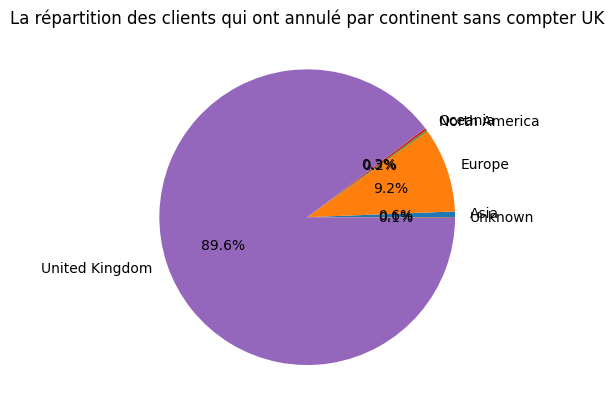

In [278]:
df['Continent'] = df['Country'].map(country_to_continent)
data = df[df['Invoice'].str.contains('C')].groupby('Continent')['Customer ID'].nunique()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('La répartition des clients qui ont annulé par continent sans compter UK')
plt.show()


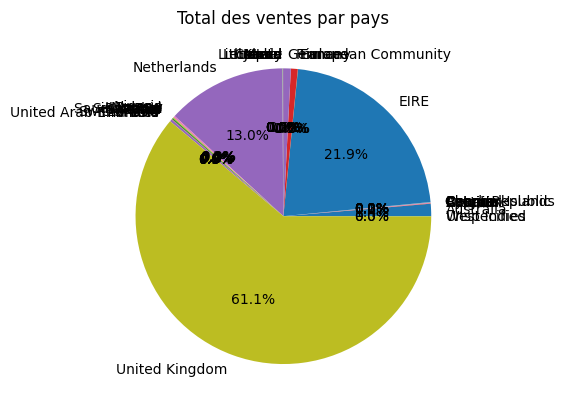

In [279]:
data = df.groupby('Country')['Montant'].sum()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par pays')
plt.show()


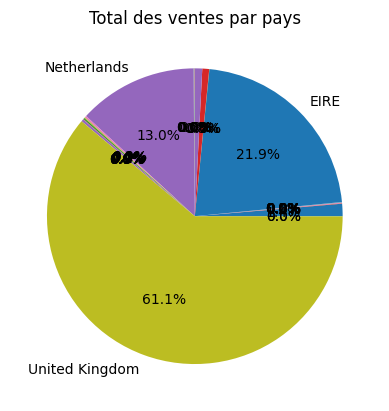

In [280]:
data = df.groupby('Country')['Montant'].sum()
total = data.sum()
labels = [label if value / total > 0.1 else '' for label, value in data.items()]
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Total des ventes par pays')
plt.show()


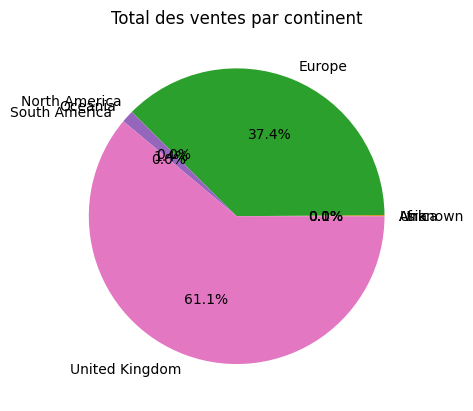

In [281]:
country_to_continent = {
'United Kingdom': 'United Kingdom',
'France': 'Europe',
'USA': 'North America',
'Belgium': 'Europe',
'Australia': 'Oceania',
'EIRE': 'Europe',
'Germany': 'Europe',
'Portugal': 'Europe',
'Japan': 'Asia',
'Denmark': 'Europe',
'Netherlands': 'Europe',
'Poland': 'Europe',
'Spain': 'Europe',
'Channel Islands': 'Europe',
'Italy': 'Europe',
'Cyprus': 'Asia',
'Greece': 'Europe',
'Norway': 'Europe',
'Austria': 'Europe',
'Sweden': 'Europe',
'United Arab Emirates': 'Asia',
'Finland': 'Europe',
'Switzerland': 'Europe',
'Unspecified': 'Unknown',
'Nigeria': 'Africa',
'Malta': 'Europe',
'RSA': 'Africa',
'Singapore': 'Asia',
'Bahrain': 'Asia',
'Thailand': 'Asia',
'Israel': 'Asia',
'Lithuania': 'Europe',
'West Indies': 'North America',
'Korea': 'Asia',
'Brazil': 'South America',
'Canada': 'North America',
'Iceland': 'Europe',
'Lebanon': 'Asia',
'Saudi Arabia': 'Asia',
'Czech Republic': 'Europe',
'European Community': 'Europe'
}

df['Continent'] = df['Country'].map(country_to_continent)

data = df.groupby('Continent')['Montant'].sum()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par continent')
plt.show()


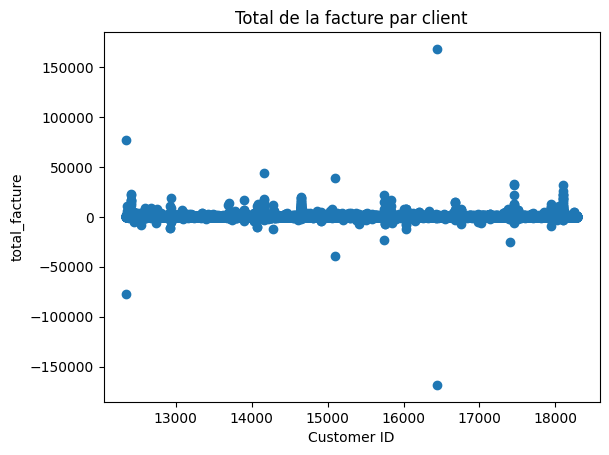

In [282]:
# Créez un masque pour supprimer les doublons de 'Invoice'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.scatter(df_filtered['Customer ID'], df_filtered['total_facture'])
plt.xlabel('Customer ID')
plt.ylabel('total_facture')
plt.title('Total de la facture par client') # Ajout d'un titre

plt.show()

In [283]:
df[df['total_facture']  >40000]


,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent
33984,493819,21912,216,2010-01-07,2010,1,3.39,14156.0,EIRE,732.24,44051.6,13873499.47,10.0,128.0,64.0,3.0,33.0,10.0,Europe
33985,493819,21749,288,2010-01-07,2010,1,1.85,14156.0,EIRE,532.80,44051.6,13873499.47,10.0,128.0,64.0,3.0,33.0,10.0,Europe
33986,493819,21974,288,2010-01-07,2010,1,1.25,14156.0,EIRE,360.00,44051.6,13873499.47,10.0,128.0,64.0,3.0,33.0,10.0,Europe
33987,493819,21877,288,2010-01-07,2010,1,1.06,14156.0,EIRE,305.28,44051.6,13873499.47,10.0,128.0,64.0,3.0,33.0,10.0,Europe
33988,493819,21746,192,2010-01-07,2010,1,1.06,14156.0,EIRE,203.52,44051.6,13873499.47,10.0,128.0,64.0,3.0,33.0,10.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34075,493819,85206B,216,2010-01-07,2010,1,1.45,14156.0,EIRE,313.20,44051.6,13873499.47,10.0,128.0,64.0,3.0,33.0,10.0,Europe
34076,493819,21437,216,2010-01-07,2010,1,2.95,14156.0,EIRE,637.20,44051.6,13873499.47,10.0,128.0,64.0,3.0,33.0,10.0,Europe
34077,493819,21438,216,2010-01-07,2010,1,2.95,14156.0,EIRE,637.20,44051.6,13873499.47,10.0,128.0,64.0,3.0,33.0,10.0,Europe
455654,541431,23166,74215,2011-01-18,2011,1,1.04,12346.0,United Kingdom,77183.60,77183.6,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom


In [284]:
df[df['total_facture'] < -20000]


,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent
188812,C512770,M,-1,2010-06-17,2010,6,25111.09,17399.0,United Kingdom,-25111.09,-25111.09,-25111.09,0.0,1.0,0.0,0.0,1.0,0.0,United Kingdom
455659,C541433,23166,-74215,2011-01-18,2011,1,1.04,12346.0,United Kingdom,-77183.60,-77183.60,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom
529902,C550456,48185,-670,2011-04-18,2011,4,6.75,15749.0,United Kingdom,-4522.50,-22998.40,53845.20,0.0,0.0,4.0,0.0,0.0,1.0,United Kingdom
529903,C550456,47566B,-1300,2011-04-18,2011,4,2.55,15749.0,United Kingdom,-3315.00,-22998.40,53845.20,0.0,0.0,4.0,0.0,0.0,1.0,United Kingdom
529904,C550456,85123A,-1930,2011-04-18,2011,4,2.55,15749.0,United Kingdom,-4921.50,-22998.40,53845.20,0.0,0.0,4.0,0.0,0.0,1.0,United Kingdom
529905,C550456,21175,-2000,2011-04-18,2011,4,1.85,15749.0,United Kingdom,-3700.00,-22998.40,53845.20,0.0,0.0,4.0,0.0,0.0,1.0,United Kingdom
529906,C550456,21108,-3114,2011-04-18,2011,4,2.10,15749.0,United Kingdom,-6539.40,-22998.40,53845.20,0.0,0.0,4.0,0.0,0.0,1.0,United Kingdom
576774,C556445,M,-1,2011-06-10,2011,6,38970.00,15098.0,United Kingdom,-38970.00,-38970.00,649.50,0.0,0.0,5.0,0.0,0.0,2.0,United Kingdom
823884,C581484,23843,-80995,2011-12-09,2011,12,2.08,16446.0,United Kingdom,-168469.60,-168469.60,-3.20,0.0,1.0,3.0,0.0,1.0,1.0,United Kingdom


In [285]:
# df_client = df.loc[df['Customer ID'] == 12346.0    ]       
# df_client
# 15098.0	
# C556445	
# 556444

#####
# 12346.0	
# 541431
# C541433	

#####
# 16446.0
# 581483
# C581484

#####  '540815','540818','C550456'


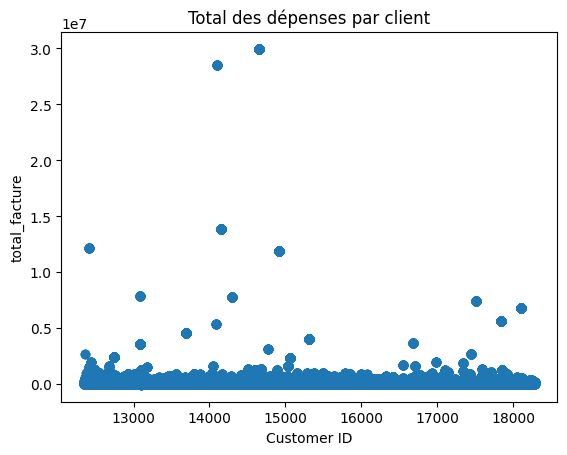

In [286]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.scatter(df_filtered['Customer ID'], df_filtered['Montant'])
plt.xlabel('Customer ID')
plt.ylabel('total_facture')
plt.title('Total des dépenses par client') # Ajout d'un titre

plt.show()

In [287]:
mask = ~df.duplicated(subset='Customer ID') & (df['Montant'] > 3000000)
df_filtered = df[mask].sort_values(by='Montant', ascending=False)

df_filtered 
# 29 957 131.19

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent
4547,489889,22271,96,2009-12-02,2009,12,2.55,14646.0,Netherlands,244.80,4734.24,29957131.19,5.0,84.0,75.0,0.0,9.0,3.0,Europe
648440,564764,16207B,1,2011-08-30,2011,8,2.46,14096.0,United Kingdom,2.46,21.84,28532583.09,0.0,0.0,34.0,0.0,0.0,17.0,United Kingdom
994,489546,84050,6,2009-12-01,2009,12,1.65,14156.0,EIRE,9.90,584.50,13873499.47,10.0,128.0,64.0,3.0,33.0,10.0,Europe
199042,513987,21917,24,2010-06-30,2010,6,0.42,12415.0,Australia,10.08,2326.74,12129731.00,0.0,7.0,26.0,0.0,0.0,5.0,Oceania
437,489520,35751C,12,2009-12-01,2009,12,0.75,14911.0,EIRE,9.00,733.63,11931038.60,16.0,262.0,232.0,7.0,61.0,44.0,Europe
14032,490937,22273,24,2009-12-08,2009,12,2.95,13081.0,United Kingdom,70.80,2285.58,7890866.30,1.0,24.0,19.0,0.0,6.0,10.0,United Kingdom
19356,491612,16168S,216,2009-12-11,2009,12,0.09,14298.0,United Kingdom,19.44,849.94,7788613.81,2.0,42.0,40.0,0.0,1.0,1.0,United Kingdom
2595,489702,22086,280,2009-12-02,2009,12,2.55,17511.0,United Kingdom,714.00,3108.64,7427754.43,2.0,41.0,42.0,0.0,11.0,14.0,United Kingdom
54,489438,21329,28,2009-12-01,2009,12,0.98,18102.0,United Kingdom,27.44,2286.24,6778621.37,9.0,86.0,58.0,0.0,6.0,2.0,United Kingdom
4272,489875,79160,11,2009-12-02,2009,12,2.10,17841.0,United Kingdom,23.10,530.76,5681697.88,9.0,119.0,161.0,1.0,34.0,43.0,United Kingdom


In [288]:
to_remove = ['C556445', '556444', '541431', 'C541433', '581483', 'C581484', 'C512770','540815','540818','C550456']  #  attention C512770 c'est 1 seul ligne manual
df = df[~df['Invoice'].isin(to_remove)]


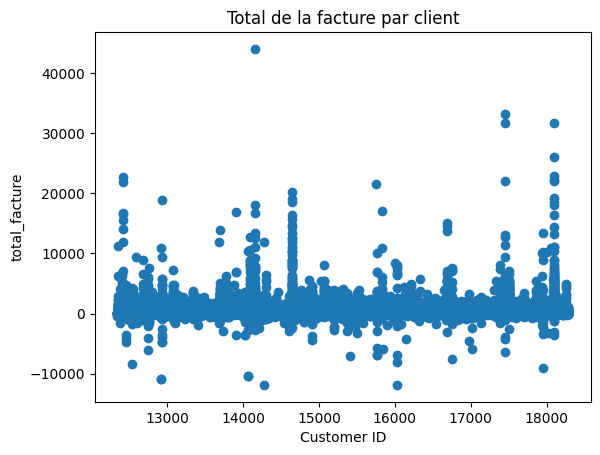

In [289]:
# Créez un masque pour supprimer les doublons de 'Invoice'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.scatter(df_filtered['Customer ID'], df_filtered['total_facture'])
plt.xlabel('Customer ID')
plt.ylabel('total_facture')
plt.title('Total de la facture par client') # Ajout d'un titre

plt.show()

pour ne conserver que les lignes où la valeur de la colonne ‘total_client_années’ est inférieure ou égale à 5000000. 

In [290]:
# df = df[df['total_client_années'] <= 5000000]


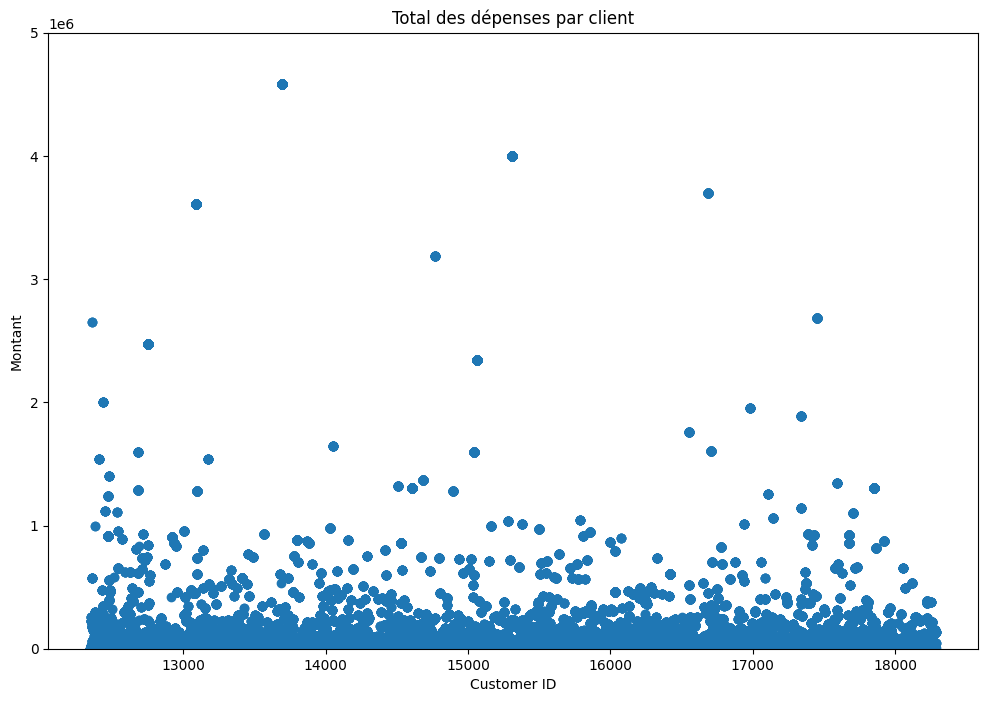

In [291]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.figure(figsize=(12, 8))

plt.scatter(df_filtered['Customer ID'], df_filtered['Montant'])

plt.xlabel('Customer ID')
plt.ylabel('Montant')
plt.title('Total des dépenses par client') # Ajout d'un titre

# Effectuez un zoom sur la partie supérieure droite du graphique
plt.ylim(0, 5000000)


plt.show()

In [292]:
# # Créez un masque pour supprimer les doublons de 'Customer ID'
# mask = df.duplicated(subset=['Customer ID'], keep='first')
# df_filtered = df[~mask]

# # Calculez le nombre de tranches
# max_value = df_filtered['Montant'].max()
# n_bins = int(max_value / 100) + 1

# # Calculez les limites des tranches
# bin_edges = np.arange(0, n_bins * 500, 500)

# # Calculez le nombre de 'Customer ID' uniques par tranche
# df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)
# n_unique_per_bin = df_filtered.groupby('bin')['Customer ID'].nunique()

# # Créez le bar plot
# plt.figure(figsize=(12, 8))
# n_unique_per_bin.plot(kind='bar')
# plt.xlabel('Montant')
# plt.ylabel('Nombre de Customer ID uniques')
# plt.title('Nombre de Customer ID uniques par tranche de total_client_années')

# plt.show()



C:\Users\impej\AppData\Local\Temp\ipykernel_16732\537746103.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)


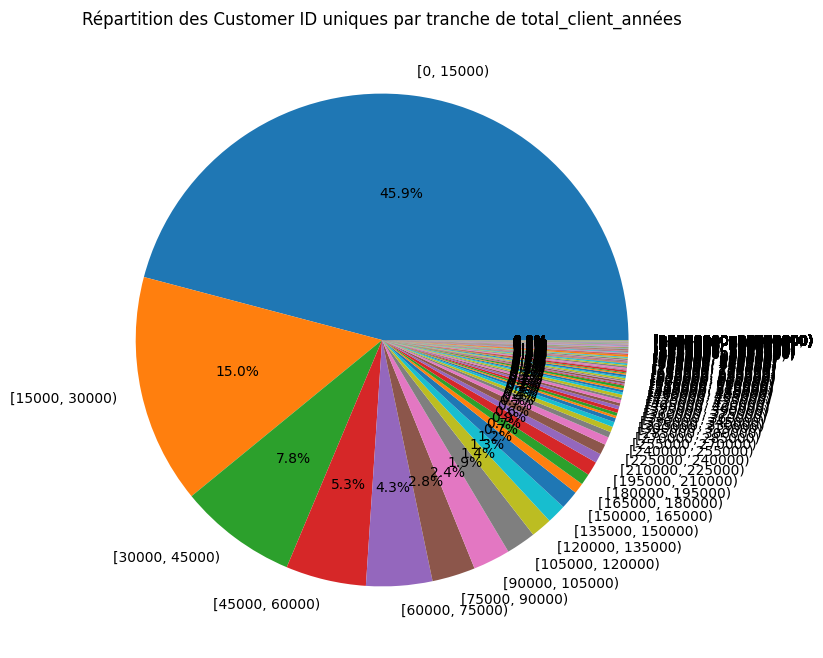

In [293]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Calculez le nombre de tranches
max_value = df_filtered['Montant'].max()
n_bins = int(max_value / 15000) + 1

# Calculez les limites des tranches
bin_edges = np.arange(0, n_bins * 15000, 15000)

# Calculez le nombre de 'Customer ID' uniques par tranche
df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)
n_unique_per_bin = df_filtered.groupby('bin')['Customer ID'].nunique()

# Calculez les pourcentages
percentages = n_unique_per_bin / n_unique_per_bin.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des Customer ID uniques par tranche de total_client_années')

plt.show()


C:\Users\impej\AppData\Local\Temp\ipykernel_16732\224287086.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)


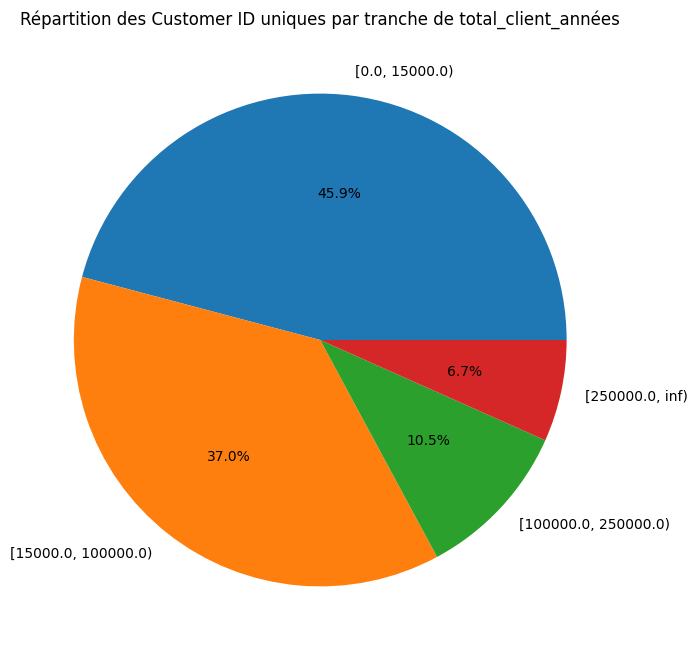

In [294]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Définissez les limites des tranches
bin_edges = [0, 15000, 100000, 250000, np.inf]

# Calculez le nombre de 'Customer ID' uniques par tranche
df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)
n_unique_per_bin = df_filtered.groupby('bin')['Customer ID'].nunique()

# Calculez les pourcentages
percentages = n_unique_per_bin / n_unique_per_bin.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des Customer ID uniques par tranche de total_client_années')

plt.show()


In [295]:
df[df['StockCode'].astype(str).str.startswith('T')]


,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent
21779,491725,TEST001,10,2009-12-14,2009,12,4.5,12346.0,United Kingdom,45.0,45.0,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom
22035,491742,TEST001,5,2009-12-14,2009,12,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom
22038,491744,TEST001,5,2009-12-14,2009,12,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom
28943,492718,TEST001,5,2009-12-18,2009,12,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom
28955,492722,TEST002,1,2009-12-18,2009,12,1.0,12346.0,United Kingdom,1.0,1.0,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom
31760,493410,TEST001,5,2010-01-04,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom
31762,493412,TEST001,5,2010-01-04,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom
38451,494450,TEST001,5,2010-01-14,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom
45590,495295,TEST001,5,2010-01-22,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,United Kingdom
63878,497819,TEST001,5,2010-02-12,2010,2,0.0,14103.0,United Kingdom,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,United Kingdom


In [296]:
# df = df[~df['StockCode'].astype(str).str.startswith('T')]


In [297]:
# # Définissez les limites des tranches
# bin_edges = [0, 15000, 100000, 250000, np.inf]

# # Créez la colonne 'niveau_achat'
# df['niveau_achat'] = pd.cut(df['total_client_années'], bins=bin_edges, right=False)

# Définissez les limites des tranches
bin_edges = [0, 15000, 100000, 250000, np.inf]

# Définissez les labels pour les tranches
bin_labels = [1, 2, 3, 4]

# Créez la colonne 'niveau_achat'
df['niveau_achat'] = pd.cut(df['Montant'], bins=bin_edges, labels=bin_labels, right=False)


In [298]:
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,niveau_achat
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1
824360,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1
824361,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1
824362,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1


## R de rfm   récence

In [299]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['LastInvoiceDate'] = df.groupby('Customer ID')['InvoiceDate'].transform('max')
df['Recency'] = df['InvoiceDate'].max() - df['LastInvoiceDate']
df['Recency'] = df['Recency'].dt.days
df = df.drop(columns=['LastInvoiceDate'])


In [300]:
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,niveau_achat,Recency
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0
824360,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0
824361,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0
824362,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0


##  Créer la colonne "Frequency"


In [301]:
df['Frequency'] = df['nombre_commande_client_années_2009'] + df['nombre_commande_client_années_2010'] + df['nombre_commande_client_années_2011']
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,niveau_achat,Recency,Frequency
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0
824360,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0
824361,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0
824362,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0


In [302]:
df['Frequency_reel'] = df['nombre_commande_client_années_2009'] + df['nombre_commande_client_années_2010'] + df['nombre_commande_client_années_2011'] - df['nombre_commande_client_années_annulées_2009'] - df['nombre_commande_client_années_annulées_2010'] - df['nombre_commande_client_années_annulées_2011']
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,niveau_achat,Recency,Frequency,Frequency_reel
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0
824360,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0
824361,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0
824362,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0


In [303]:
unique_invoices = df[df['Customer ID'] == 12680.0]['Invoice'].nunique()
print(f'Le client avec l\'ID 13085.0 a {unique_invoices} factures uniques.')


Le client avec l'ID 13085.0 a 4 factures uniques.


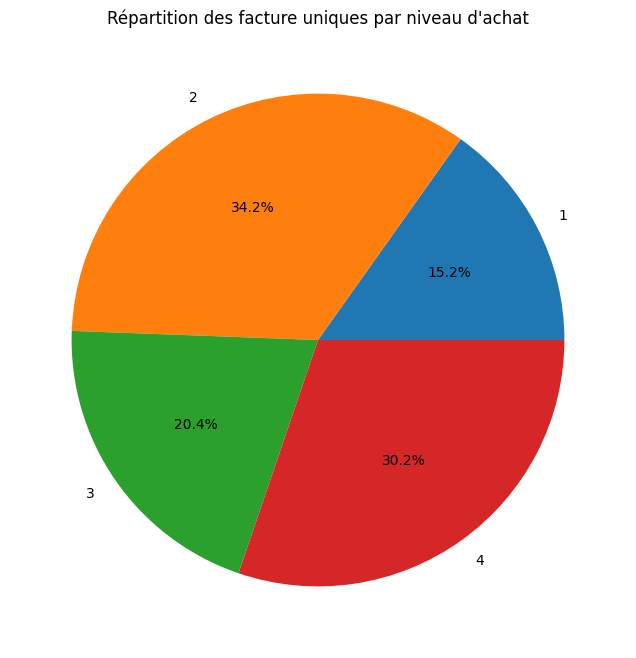

In [304]:
# Créez un masque pour supprimer les doublons de 'Invoice'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Calculez le nombre d' 'Invoice' uniques par niveau d'achat
n_unique_per_level = df_filtered.groupby('niveau_achat')['Invoice'].nunique()

# Calculez les pourcentages
percentages = n_unique_per_level / n_unique_per_level.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des facture uniques par niveau d\'achat')

plt.show()


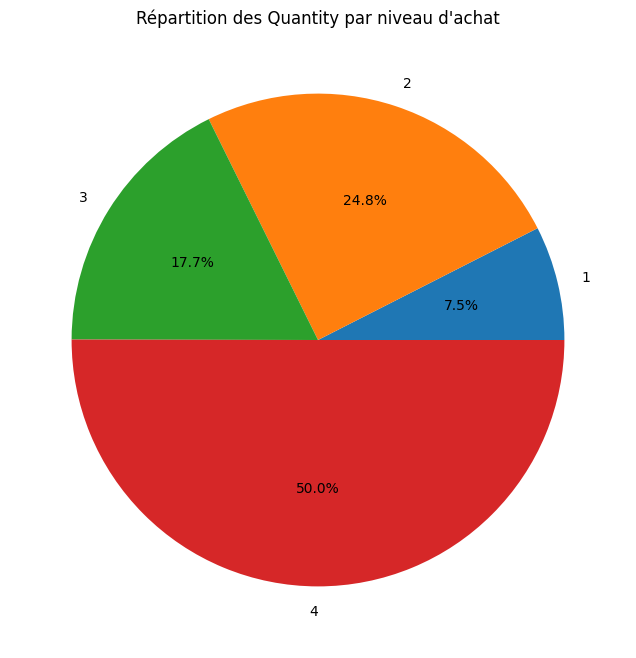

In [305]:
# Calculez la somme des valeurs de 'Quantity' par niveau d'achat
quantity_per_level = df.groupby('niveau_achat')['Quantity'].sum()

# Calculez les pourcentages
percentages = quantity_per_level / quantity_per_level.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des Quantity par niveau d\'achat')

plt.show()


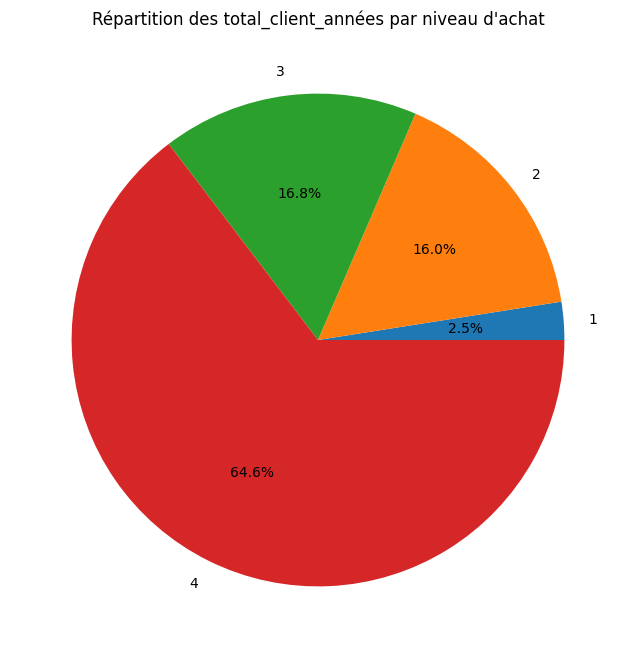

In [306]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Calculez la somme des valeurs de 'total_client_années' par niveau d'achat
total_per_level = df_filtered.groupby('niveau_achat')['Montant'].sum()

# Calculez les pourcentages
percentages = total_per_level / total_per_level.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des total_client_années par niveau d\'achat')

plt.show()


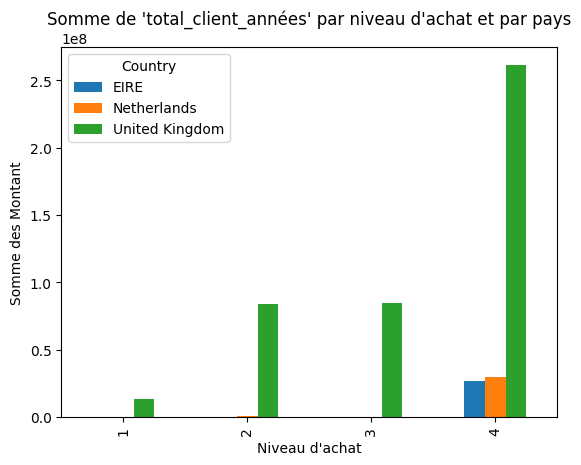

In [307]:
import pandas as pd
import matplotlib.pyplot as plt

# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Filtrer les données pour inclure uniquement les pays spécifiés
df_filtered = df_filtered[df_filtered['Country'].isin(['EIRE', 'Netherlands', 'United Kingdom'])]

# Grouper les données par 'niveau_achat' et 'Country'
grouped = df_filtered.groupby(['niveau_achat', 'Country'])['Montant'].sum().unstack()

# Créer un graphique à barres
grouped.plot(kind='bar')
plt.title('Somme de \'total_client_années\' par niveau d\'achat et par pays')
plt.xlabel('Niveau d\'achat')
plt.ylabel('Somme des Montant')
plt.show()


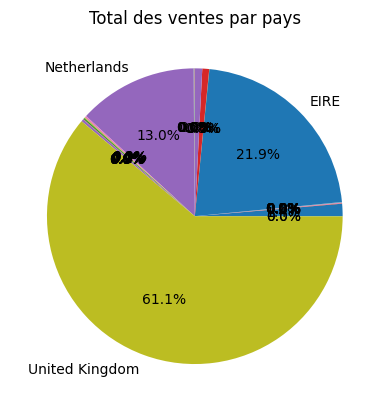

In [308]:
data = df.groupby('Country')['Montant'].sum()
total = data.sum()
labels = [label if value / total > 0.1 else '' for label, value in data.items()]
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Total des ventes par pays')
plt.show()

In [309]:
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,niveau_achat,Recency,Frequency,Frequency_reel
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,United Kingdom,2,157,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0
824360,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0
824361,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0
824362,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0
